# CIFAR10 DATASET

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import datasets

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 6d958be074577803d12ecdefd02955f39262c83c16fe9348329d7fe0b5c001ce so we will re-download the data.
170498071/170498071 [==============================] - 197s 1us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
y_train=y_train.flatten()
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

In [7]:
y_test=y_test.flatten()

In [8]:
categories=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [11]:
def img_show(X,y,index):
    plt.imshow(X[4])
    plt.xlabel(categories[y[4]])
    plt.show()

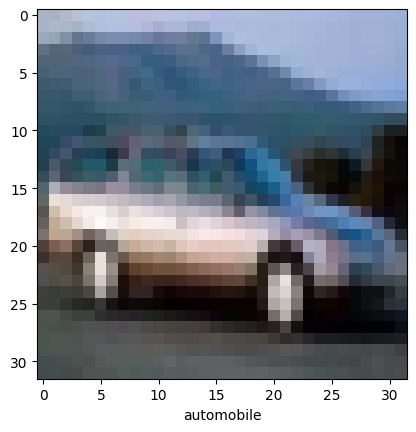

In [12]:
img_show(X_train,y_train,8)

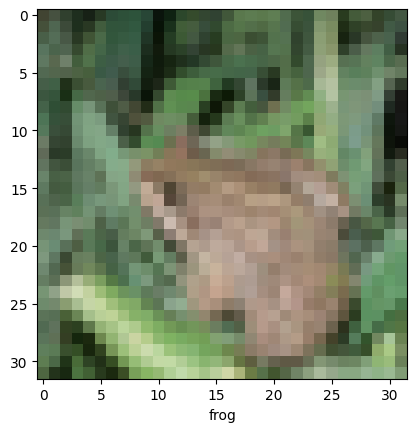

In [13]:
img_show(X_test,y_test,8)

In [14]:
X_train = X_train/255

In [15]:
X_test = X_test/255

In [23]:
cnn = keras.Sequential([
    keras.layers.Conv2D(input_shape=(32, 32, 3),filters=35,kernel_size=3),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(kernel_size=(3,3),padding="same",filters=60,activation="relu"),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(input_shape=(32, 32, 3)),
    keras.layers.Dense(1000,activation="relu"),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(10,activation="sigmoid")
])


In [28]:
cnn.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["Accuracy"])

In [29]:
cnn.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 203s 128ms/step - loss: 1.3214 - Accuracy: 0.5247
Epoch 2/5
1563/1563 [==============================] - 223s 143ms/step - loss: 0.9044 - Accuracy: 0.6826
Epoch 3/5
1563/1563 [==============================] - 208s 133ms/step - loss: 0.6918 - Accuracy: 0.7592
Epoch 4/5
1563/1563 [==============================] - 196s 125ms/step - loss: 0.5158 - Accuracy: 0.8200
Epoch 5/5
1563/1563 [==============================] - 232s 149ms/step - loss: 0.3485 - Accuracy: 0.8796


In [30]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 12s 34ms/step - loss: 0.9979 - Accuracy: 0.7089


[0.9979395270347595, 0.708899974822998]